<a href="https://colab.research.google.com/github/Yahyabonyguda/Data_Science_Assignment/blob/main/Copy_of_Comprehensive_Analysis_of_Sales_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving Chocolate Sales (1).csv to Chocolate Sales (1).csv


In [ ]:
import pandas as pd
import io

df = pd.read_csv(io.BytesIO(uploaded['Chocolate Sales (1).csv']))


# Now you can work with the DataFrame 'df'

In [ ]:
print(df.head())

     Sales Person    Country              Product       Date    Amount  \
0  Jehu Rudeforth         UK      Mint Chip Choco  04-Jan-22   $5,320    
1     Van Tuxwell      India        85% Dark Bars  01-Aug-22   $7,896    
2    Gigi Bohling      India  Peanut Butter Cubes  07-Jul-22   $4,501    
3    Jan Morforth  Australia  Peanut Butter Cubes  27-Apr-22  $12,726    
4  Jehu Rudeforth         UK  Peanut Butter Cubes  24-Feb-22  $13,685    

   Boxes Shipped  
0            180  
1             94  
2             91  
3            342  
4            184  


Data Understanding & Cleaning

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from prophet import Prophet
from itertools import combinations
from collections import Counter

Display basic information

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Sales Person   1094 non-null   object
 1   Country        1094 non-null   object
 2   Product        1094 non-null   object
 3   Date           1094 non-null   object
 4   Amount         1094 non-null   object
 5   Boxes Shipped  1094 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 51.4+ KB


In [ ]:
df.head()

,Sales Person,Country,Product,Date,Amount,Boxes Shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,04-Jan-22,"$5,320",180
1,Van Tuxwell,India,85% Dark Bars,01-Aug-22,"$7,896",94
2,Gigi Bohling,India,Peanut Butter Cubes,07-Jul-22,"$4,501",91
3,Jan Morforth,Australia,Peanut Butter Cubes,27-Apr-22,"$12,726",342
4,Jehu Rudeforth,UK,Peanut Butter Cubes,24-Feb-22,"$13,685",184


In [ ]:
df['Amount'] = df['Amount'].replace('[\$,]', '', regex=True).astype(float)

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

<ipython-input-8-4ac1f8d99197>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


Check for missing values

In [ ]:
df.isnull().sum()

,0
Sales Person,0
Country,0
Product,0
Date,0
Amount,0
Boxes Shipped,0


Exploratory Data Analysis (EDA)

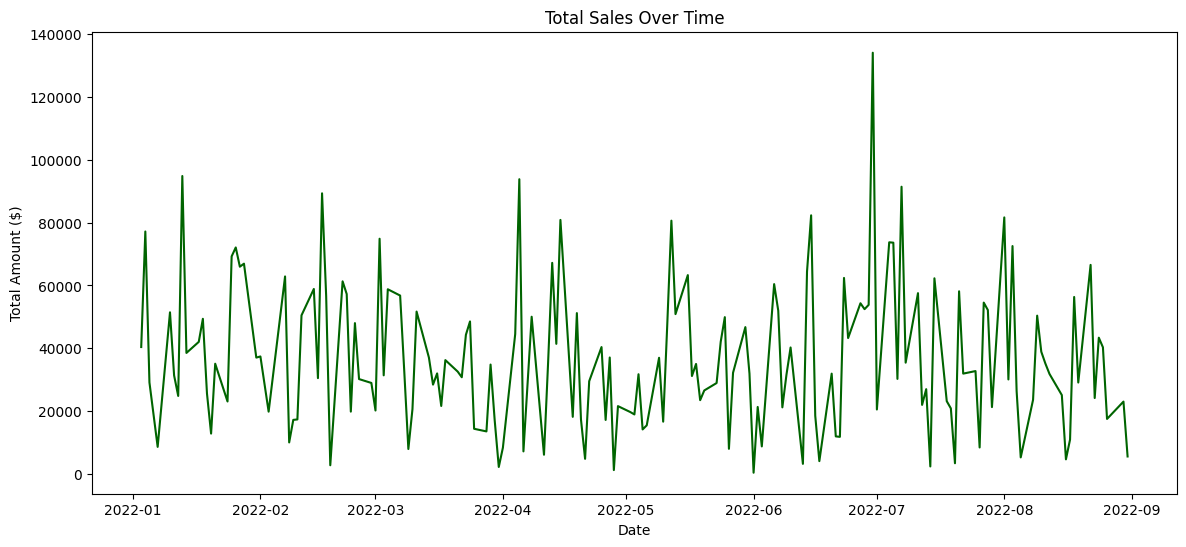

In [ ]:
sales_by_date = df.groupby('Date')['Amount'].sum().reset_index()

plt.figure(figsize=(14, 6))
sns.lineplot(data=sales_by_date, x='Date', y='Amount', color='darkgreen')
plt.title('Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Amount ($)')
plt.show()

Product Preference Analysis

<ipython-input-15-3a80773e6171>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette='coolwarm')


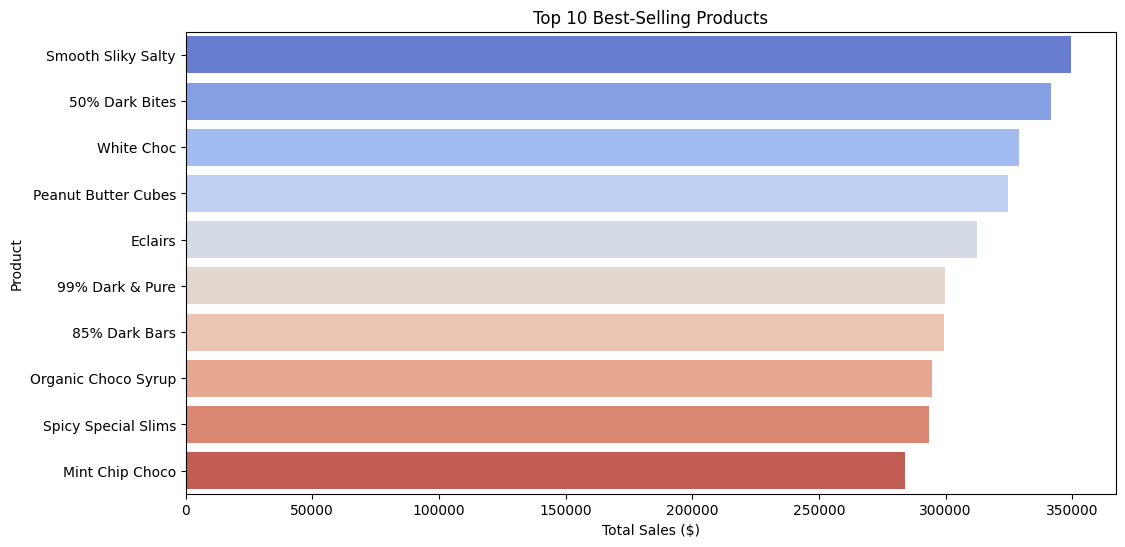

In [ ]:
top_products = df.groupby('Product')['Amount'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=top_products.values, y=top_products.index, palette='coolwarm')
plt.title('Top 10 Best-Selling Products')
plt.xlabel('Total Sales ($)')
plt.ylabel('Product')
plt.show()

Average sales per product

<ipython-input-16-6a9a7d77168f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_sales_product.values, y=avg_sales_product.index, palette='magma')


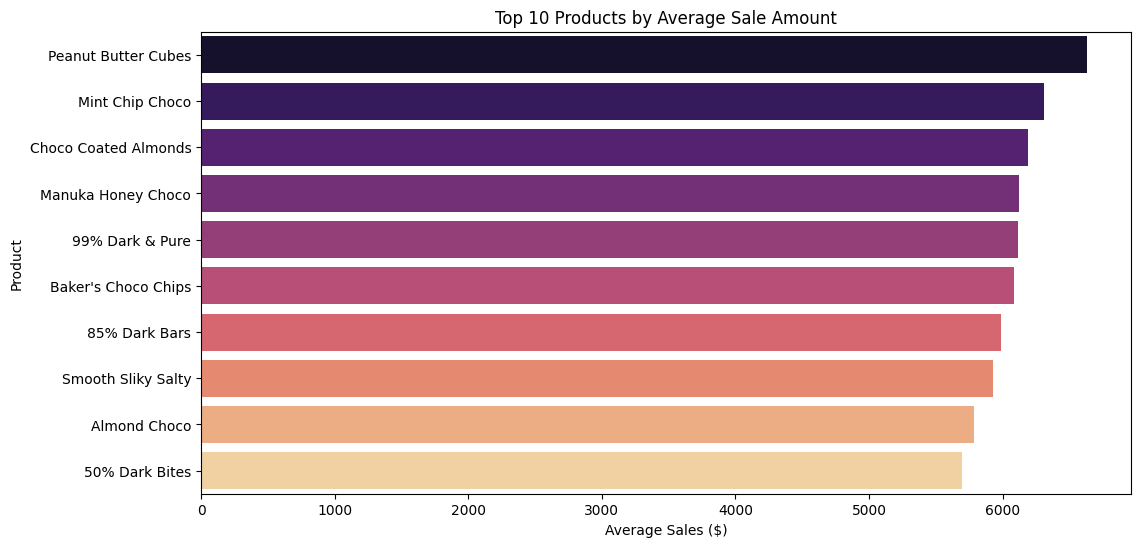

In [ ]:
avg_sales_product = df.groupby('Product')['Amount'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=avg_sales_product.values, y=avg_sales_product.index, palette='magma')
plt.title('Top 10 Products by Average Sale Amount')
plt.xlabel('Average Sales ($)')
plt.ylabel('Product')
plt.show()